# FBI Uniform Crime Reporting Analysis | 2012

*Author: Team members name*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


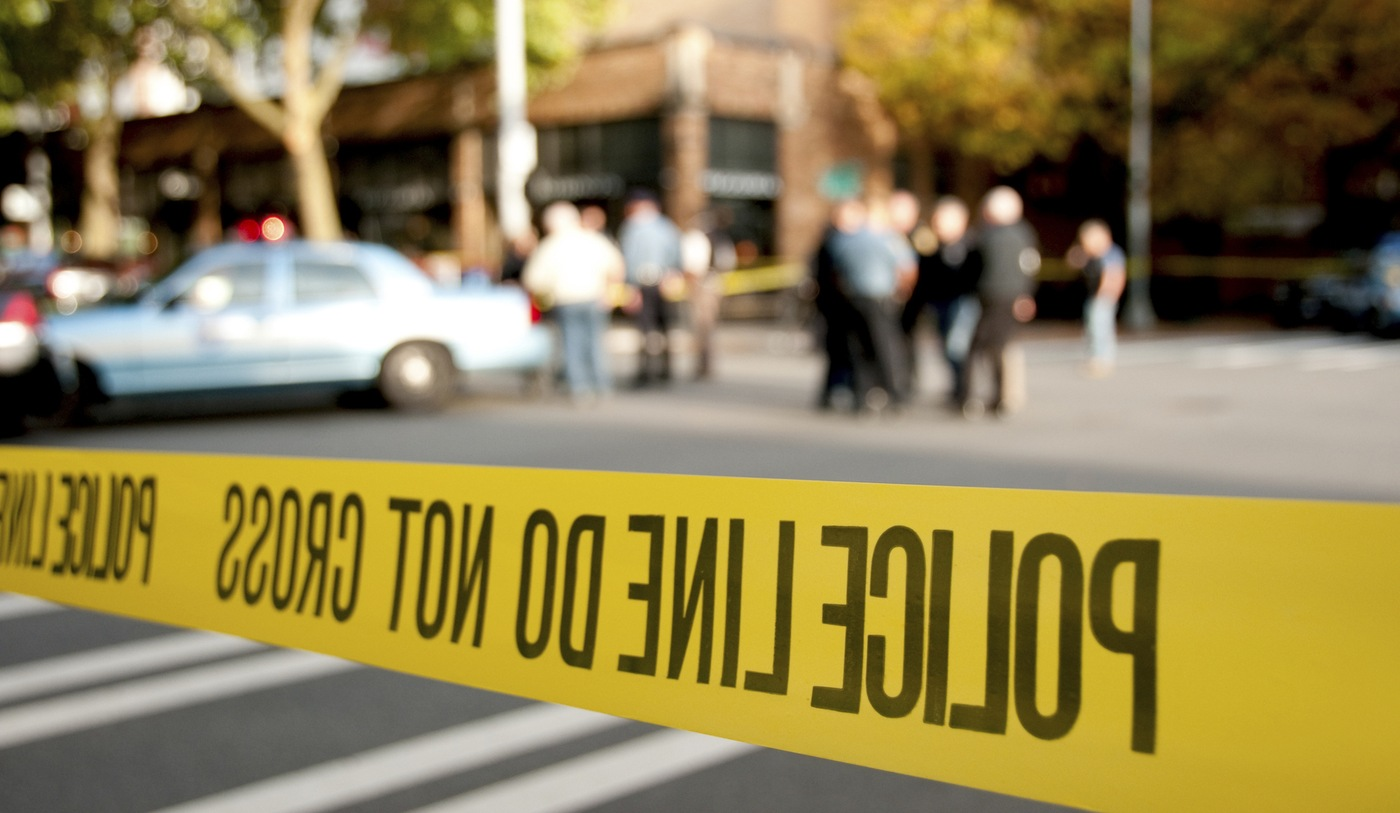

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **2- Importing libraries**
---

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

># **3- Importing dataset**
---

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/U.S._Offense_Type_by_Agency_2012.xlsx', skiprows=4, skipfooter=4)

> # **4- Basic Text Data Pre-processing**
---

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Assault\nOffenses', 'Aggravated\nAssault', 'Simple\nAssault',
       'Intimidation', 'Homicide\nOffenses',
       'Murder and Nonnegligent Manslaughter', 'Negligent\nManslaughter',
       'Justifiable\nHomicide', 'Kidnapping/\nAbduction', 'Sex\nOffenses',
       'Rape', 'Sodomy', 'Sexual\nAssault\nWith An\nObject', 'Fondling',
       'Sex\nOffenses,\nNonforcible', 'Incest', 'Statutory\nRape', 'Arson',
       'Bribery', 'Burglary/\nBreaking &\nEntering',
       'Counter-\nfeiting/\nForgery', 'Destruction/\nDamage/\nVandalism',
       'Embezzle-\nment', 'Extortion/\nBlackmail', 'Fraud\nOffenses',
       'False\nPretenses/\nSwindle/\nConfidence\nGame',
       'Credit Card/\nAutomated\nTeller\nMachine Fraud', 'Imperson-\nation',
       'Welfare\nFraud', 'Wire\nFraud', 'Larceny-\nTheft\nOffenses',
       'Pocket-\npicking', 'Purse-\nsnatching', 'Shop-\nlifting',
       'Theft\nFrom\nBuilding', 'Theft\nFrom\nCoin-\noperat

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'State', 'Unnamed: 1': 'Agency Type', 'Unnamed: 2': 'Agency Name', 'Unnamed: 3': 'Population'})

In [ ]:
df.columns = df.columns.map(lambda x: x.replace('\n','').replace(',','').replace('1',''))

In [ ]:
df.head()

,State,Agency Type,Agency Name,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,Prost-itution,Assistingor Pro-motingProst-itution,WeaponLawViolations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,NaN,NaN,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,NaN,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [ ]:
df['State'] = df['State'].fillna(method='ffill')

In [ ]:
df['Agency Type'] = df['Agency Type'].fillna(method='ffill')

In [ ]:
df['Population'] = df['Population'].fillna(method='ffill')

In [ ]:
df.head()

,State,Agency Type,Agency Name,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,Prost-itution,Assistingor Pro-motingProst-itution,WeaponLawViolations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264.0,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


In [ ]:
df.shape

(5235, 59)

In [ ]:
df.isnull().sum()

State                                          0
Agency Type                                    0
Agency Name                                    0
Population                                     0
AssaultOffenses                              462
AggravatedAssault                           1156
SimpleAssault                                588
Intimidation                                1264
HomicideOffenses                            4298
Murder and Nonnegligent Manslaughter        4380
NegligentManslaughter                       5086
JustifiableHomicide                         5156
Kidnapping/Abduction                        3231
SexOffenses                                 1592
Rape                                        2392
Sodomy                                      3716
SexualAssaultWith AnObject                  4400
Fondling                                    2286
SexOffensesNonforcible                      3651
Incest                                      4716
StatutoryRape       

In [ ]:
df.dtypes

State                                        object
Agency Type                                  object
Agency Name                                  object
Population                                  float64
AssaultOffenses                             float64
AggravatedAssault                           float64
SimpleAssault                               float64
Intimidation                                float64
HomicideOffenses                            float64
Murder and Nonnegligent Manslaughter        float64
NegligentManslaughter                       float64
JustifiableHomicide                         float64
Kidnapping/Abduction                        float64
SexOffenses                                 float64
Rape                                        float64
Sodomy                                      float64
SexualAssaultWith AnObject                  float64
Fondling                                    float64
SexOffensesNonforcible                      float64
Incest      

In [ ]:
df = df.replace(np.nan,0)

In [ ]:
df.isnull().sum()

State                                       0
Agency Type                                 0
Agency Name                                 0
Population                                  0
AssaultOffenses                             0
AggravatedAssault                           0
SimpleAssault                               0
Intimidation                                0
HomicideOffenses                            0
Murder and Nonnegligent Manslaughter        0
NegligentManslaughter                       0
JustifiableHomicide                         0
Kidnapping/Abduction                        0
SexOffenses                                 0
Rape                                        0
Sodomy                                      0
SexualAssaultWith AnObject                  0
Fondling                                    0
SexOffensesNonforcible                      0
Incest                                      0
StatutoryRape                               0
Arson                             

> # **6- Exploratory data analysis**

## TOP 5 States by total number of Assault offenses

In [ ]:
# subset of data without cities
crime_data_no_cities = df[df['Agency Type'] != 'City']

# pivot table to show sub-types of Assault offenses by state
assault_pivot = crime_data_no_cities.pivot_table(index='State', values=['AssaultOffenses', 'AggravatedAssault', 'SimpleAssault', 'Intimidation'], aggfunc='sum').reset_index()

# sort by total number of Assault offenses
assault_pivot_sorted = assault_pivot.sort_values(by='AssaultOffenses', ascending=False).head(5)

In [ ]:
assault_pivot_sorted

,State,AggravatedAssault,AssaultOffenses,Intimidation,SimpleAssault
27,TENNESSEE,29356.0,147516.0,30259.0,87901.0
14,MICHIGAN,26003.0,129651.0,23917.0,79731.0
31,VIRGINIA,8941.0,103866.0,11131.0,83794.0
21,OHIO,7808.0,97495.0,39761.0,49926.0
25,SOUTH CAROLINA,17412.0,91139.0,14780.0,58947.0


## Different Assaults aggregated for agency type university and colleges

In [ ]:
df_q2 = df[df["Agency Type"]=="Universities and Colleges"]

In [ ]:
df_q2.head()

,State,Agency Type,Agency Name,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,Prost-itution,Assistingor Pro-motingProst-itution,WeaponLawViolations
149,ARKANSAS,Universities and Colleges,"Arkansas State University, Jonesboro",13900.0,30.0,4.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,ARKANSAS,Universities and Colleges,Arkansas Tech University,10464.0,10.0,1.0,2.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,ARKANSAS,Universities and Colleges,Henderson State University,3774.0,18.0,2.0,9.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,ARKANSAS,Universities and Colleges,University of Arkansas:,3774.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,ARKANSAS,Universities and Colleges,Fayetteville,23199.0,54.0,6.0,22.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
df_q2 = df_q2.groupby('Agency Type').sum()[[ 'AssaultOffenses','HomicideOffenses','Kidnapping/Abduction','SexOffenses','SexOffensesNonforcible','FraudOffenses','Arson','Bribery','Burglary/Breaking &Entering','Counter-feiting/Forgery','Destruction/Damage/Vandalism','Embezzle-ment','Extortion/Blackmail','Larceny-TheftOffenses','MotorVehicleTheft','Robbery','StolenPropertyOffenses ','Drug/NarcoticOffenses','GamblingOffenses','Porno-graphy/ObsceneMaterial','Prost-itutionOffenses','WeaponLawViolations']]

In [ ]:
df_q2

,AssaultOffenses,HomicideOffenses,Kidnapping/Abduction,SexOffenses,SexOffensesNonforcible,FraudOffenses,Arson,Bribery,Burglary/Breaking &Entering,Counter-feiting/Forgery,...,Extortion/Blackmail,Larceny-TheftOffenses,MotorVehicleTheft,Robbery,StolenPropertyOffenses,Drug/NarcoticOffenses,GamblingOffenses,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,WeaponLawViolations
Agency Type,,,,,,,,,,,,,,,,,,,,,
Universities and Colleges,4348.0,1.0,44.0,390.0,4.0,1125.0,140.0,2.0,2412.0,373.0,...,13.0,20630.0,405.0,176.0,278.0,9269.0,2.0,23.0,5.0,335.0


## Aggregated Results of offenses of different universities and colleges

In [ ]:
df_q3 = df[df["Agency Type"] == "Universities and Colleges"]

In [ ]:
df_q3 = df_q3.iloc[:,2:]
df_q3.drop(['Population'], axis=1, inplace=True)
df_q3.head()

,Agency Name,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,NegligentManslaughter,JustifiableHomicide,Kidnapping/Abduction,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,Prost-itution,Assistingor Pro-motingProst-itution,WeaponLawViolations
149,"Arkansas State University, Jonesboro",30.0,4.0,11.0,15.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,Arkansas Tech University,10.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Henderson State University,18.0,2.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,University of Arkansas:,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,Fayetteville,54.0,6.0,22.0,26.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
# Group by Agency Name and calculate the sum of each offense category
offenses_by_university = df_q3.groupby('Agency Name').sum()

In [ ]:
offenses_by_university.head()

,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,NegligentManslaughter,JustifiableHomicide,Kidnapping/Abduction,SexOffenses,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Porno-graphy/ObsceneMaterial,Prost-itutionOffenses,Prost-itution,Assistingor Pro-motingProst-itution,WeaponLawViolations
Agency Name,,,,,,,,,,,,,,,,,,,,,
Aiken,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Aims Community College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Ann Arbor,99.0,9.0,68.0,22.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Arapahoe Community College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Arkansas State University, Jonesboro",30.0,4.0,11.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#offenses at MSU
offenses_at_msu = offenses_by_university.loc['Michigan State University', :]

In [ ]:
offenses_at_msu.head()

AssaultOffenses      68.0
AggravatedAssault     5.0
SimpleAssault        54.0
Intimidation          9.0
HomicideOffenses      0.0
Name: Michigan State University, dtype: float64

In [ ]:
# Calculate the sum of offenses at all other universities
offenses_at_other_universities = offenses_by_university.sum() - offenses_at_msu

# Print the results
print("Offenses at MSU:")
print(offenses_at_msu)
print("\nOffenses at all other universities:")
print(offenses_at_other_universities)

Offenses at MSU:
AssaultOffenses                              68.0
AggravatedAssault                             5.0
SimpleAssault                                54.0
Intimidation                                  9.0
HomicideOffenses                              0.0
Murder and Nonnegligent Manslaughter          0.0
NegligentManslaughter                         0.0
JustifiableHomicide                           0.0
Kidnapping/Abduction                          0.0
SexOffenses                                  12.0
Rape                                          8.0
Sodomy                                        1.0
SexualAssaultWith AnObject                    1.0
Fondling                                      2.0
SexOffensesNonforcible                        0.0
Incest                                        0.0
StatutoryRape                                 0.0
Arson                                         1.0
Bribery                                       1.0
Burglary/Breaking &Entering      

In [ ]:
offenses_at_msu = pd.DataFrame(offenses_at_msu)
offenses_at_msu = offenses_at_msu.reset_index()
offenses_at_msu.rename(columns={'index':'offense'}, inplace = True)

In [ ]:
offenses_at_msu.head()

,offense,Michigan State University
0,AssaultOffenses,68.0
1,AggravatedAssault,5.0
2,SimpleAssault,54.0
3,Intimidation,9.0
4,HomicideOffenses,0.0


In [ ]:
offenses_at_other_universities = pd.DataFrame(offenses_at_other_universities)
offenses_at_other_universities = offenses_at_other_universities.reset_index()
offenses_at_other_universities.rename(columns={'index':'offense', 0: 'Other Universities'}, inplace=True)

In [ ]:
offenses_at_other_universities.head()

,offense,Other Universities
0,AssaultOffenses,4280.0
1,AggravatedAssault,389.0
2,SimpleAssault,2642.0
3,Intimidation,1249.0
4,HomicideOffenses,1.0


In [ ]:
merged_df = pd.merge(offenses_at_other_universities, offenses_at_msu, on = 'offense')

In [ ]:
merged_df.set_index(['offense'], inplace=True)

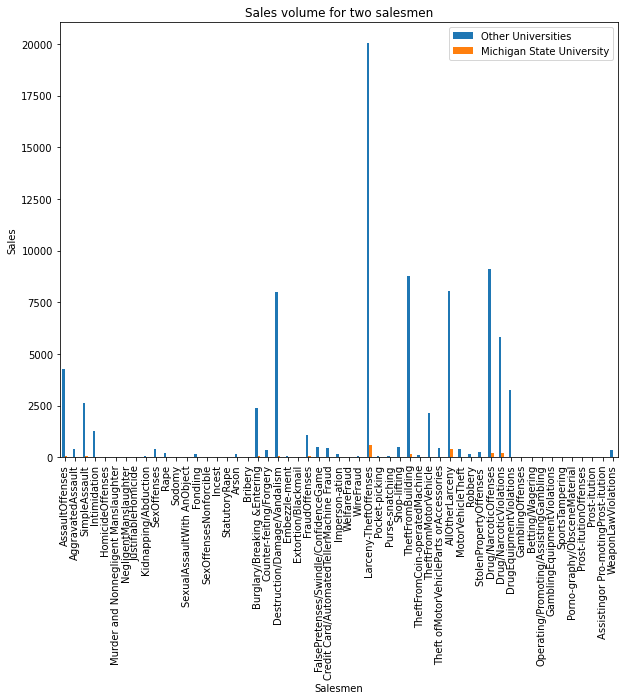

In [ ]:
merged_df.plot.bar(figsize= (10,8))
plt.xlabel('Salesmen')
plt.ylabel('Sales')
plt.title('Sales volume for two salesmen')
plt.xticks(rotation='vertical')
plt.show()

## States with Lowest Digital Frauds

In [ ]:
df_q4 = df[['State','Credit Card/AutomatedTellerMachine Fraud','WireFraud']]
df_q4.head()

,State,Credit Card/AutomatedTellerMachine Fraud,WireFraud
0,ALABAMA,109.0,0.0
1,ARIZONA,62.0,0.0
2,ARIZONA,150.0,0.0
3,ARIZONA,48.0,0.0
4,ARKANSAS,10.0,0.0


In [ ]:
df_q4['digital_offense'] = df_q4['Credit Card/AutomatedTellerMachine Fraud'] + df_q4['WireFraud']

In [ ]:
df_q4 = df_q4[['State','digital_offense']]

In [ ]:
df_q4 = df_q4.groupby('State', as_index=False).sum()
df_q4.sort_values('digital_offense', ascending=True)

,State,digital_offense
6,DISTRICT OF COLUMBIA,0.0
15,MISSISSIPPI,89.0
0,ALABAMA,109.0
30,VERMONT,145.0
8,ILLINOIS,209.0
12,MAINE,257.0
1,ARIZONA,260.0
17,MONTANA,355.0
26,SOUTH DAKOTA,375.0
20,NORTH DAKOTA,516.0


## offenses per million population

In [ ]:
offenses =df[['AssaultOffenses', 'HomicideOffenses', 'Kidnapping/Abduction', 'SexOffenses', 'SexOffensesNonforcible', 'FraudOffenses', 'Arson', 'Bribery',
'Burglary/Breaking &Entering', 'Counter-feiting/Forgery', 'Destruction/Damage/Vandalism', 'Embezzle-ment', 'Extortion/Blackmail', 'FraudOffenses', 'Larceny-TheftOffenses',
'MotorVehicleTheft', 'Robbery', 'StolenPropertyOffenses ' ,'Drug/NarcoticOffenses', 'GamblingOffenses', 'Porno-graphy/ObsceneMaterial', 'Prost-itutionOffenses', 'WeaponLawViolations']]
     

In [ ]:
df_q5 = df[['Agency Type','Agency Name', 'Population']]

In [ ]:
df_q5['sum_offenses'] = offenses.sum(axis=1)
df_q5.head()

,Agency Type,Agency Name,Population,sum_offenses
0,Cities,Hoover,82332.0,4506.0
1,Cities,Apache Junction,36986.0,2855.0
2,Cities,Gilbert,214264.0,10652.0
3,Metropolitan Counties,Yuma2,214264.0,3227.0
4,Cities,Alma,5439.0,793.0


In [ ]:
df_q5['offense/million'] = df_q5['sum_offenses']/df_q5['Population']

In [ ]:
result = df_q5.groupby(['Agency Type','Agency Name'] , as_index=False).sum()
result.sort_values('offense/million', ascending=False)

,Agency Type,Agency Name,Population,sum_offenses,offense/million
1252,Cities,Lakeside,8.0,55.0,6.875000
2727,Metropolitan Counties,Fairfax County Police Department,8557.0,42282.0,4.941218
2753,Metropolitan Counties,Greenville,5913.0,27240.0,4.606799
2865,Metropolitan Counties,Richland,27019.0,25788.0,3.991030
2771,Metropolitan Counties,Jackson,41034.0,5805.0,3.605172
...,...,...,...,...,...
1836,Cities,Pilot Knob,745.0,0.0,0.000000
1826,Cities,Philip,776.0,0.0,0.000000
3602,Other Agencies,Cummins Falls,6733.0,0.0,0.000000
3600,Other Agencies,Cumberland Mountain,6733.0,0.0,0.000000


## choropleth map of offenses 

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

# Group the data by state and sum the offense counts for each offense type
grouped_data = df.groupby('State').sum()

# Find the offense type with the highest number of offenses in each state
highest_offenses = grouped_data.idxmax(axis=1)


# Read in the shapefile of the US states
states = gpd.read_file("/content/cb_2018_us_state_500k.shp")

# Join the offense type data with the shapefile data
merged = states.merge(highest_offenses, left_on="NAME", right_index=True)

# Create a choropleth map of the data
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column="OffenseType", cmap="Set2", legend=True, ax=ax)
ax.set_title("Offense type with highest number of offenses in each state")
plt.show()

ERROR:fiona._env:Unable to open /content/cb_2018_us_state_500k.shx or /content/cb_2018_us_state_500k.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: ignored

> # **7. Feature Selection**

In [ ]:
model_df = df[['Population','Drug/NarcoticOffenses', 'Drug/NarcoticViolations',
         'DrugEquipmentViolations','TheftFromBuilding',
       'TheftFromCoin-operatedMachine', 'TheftFromMotorVehicle',
       'Theft ofMotorVehicleParts orAccessories']]

In [ ]:
model_df['sum']= model_df.iloc[:,1:].sum(axis=1)

In [ ]:
X = model_df.drop('sum',axis=1)
Y = model_df['sum']

In [ ]:
X.corr()

,Population,Drug/NarcoticOffenses,Drug/NarcoticViolations,DrugEquipmentViolations,TheftFromBuilding,TheftFromCoin-operatedMachine,TheftFromMotorVehicle,Theft ofMotorVehicleParts orAccessories
Population,1.000000,0.691719,0.707153,0.566166,0.697054,0.152588,0.827661,0.765933
Drug/NarcoticOffenses,0.691719,1.000000,0.981368,0.907843,0.769728,0.160520,0.701965,0.714075
Drug/NarcoticViolations,0.707153,0.981368,1.000000,0.810364,0.781722,0.163312,0.723841,0.752648
DrugEquipmentViolations,0.566166,0.907843,0.810364,1.000000,0.641318,0.133107,0.560989,0.535053
TheftFromBuilding,0.697054,0.769728,0.781722,0.641318,1.000000,0.143724,0.774549,0.709136
TheftFromCoin-operatedMachine,0.152588,0.160520,0.163312,0.133107,0.143724,1.000000,0.180830,0.151291
TheftFromMotorVehicle,0.827661,0.701965,0.723841,0.560989,0.774549,0.180830,1.000000,0.768604
Theft ofMotorVehicleParts orAccessories,0.765933,0.714075,0.752648,0.535053,0.709136,0.151291,0.768604,1.000000


In [ ]:
X = X.drop(labels=['Drug/NarcoticViolations', 'DrugEquipmentViolations'], axis=1)

> # **8. Data Modelling**

> ### **Modelling methods**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "lasso": Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42),
    "elastic net": ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42),
    "random forest regression": RandomForestRegressor(n_estimators=100),
    "support vector regression" : SVR(kernel='rbf', epsilon=0.001)
}

In [ ]:
results = pd.DataFrame(columns=['Model', 'RMSE','MAE','R2 Score', 'Cross Validation'])

In [ ]:
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        y_pred = fit.predict(X_test)
        cross = cross_val_score(models[model], X, Y, cv=5)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        results.loc[len(results.index)] = [model, rmse, mae, r2, cross.mean()]

In [ ]:
test_models(X_train, X_test, y_train, y_test)

> ### **Models evaluation**

In [ ]:
results

,Model,RMSE,MAE,R2 Score,Cross Validation
0,LinearRegression,1.617527e-10,6.071662e-11,1.000000,1.000000
1,Ridge,5.562610e-04,1.679214e-04,1.000000,1.000000
2,lasso,1.459456e-01,3.286880e-02,1.000000,1.000000
3,elastic net,2.775373e-01,1.377783e-01,1.000000,0.999999
4,random forest regression,6.790624e+02,4.606393e+01,0.823020,0.942860
5,support vector regression,1.613130e+03,3.120202e+02,0.001284,0.012785


> # **9- Conclusion**
---

From the above we can conclude that Linear regression model performed well compared to other models.

> # **10- Reference**
---